# Compute $\boldsymbol{J}$ in Kinetic Energy

We can define the rotational kinetic energy of a single body as

$$
\frac{1}{2} \boldsymbol{\omega}^{T} \boldsymbol{I} \boldsymbol{\omega}=\frac{1}{2} \operatorname{tr}\left([\boldsymbol{\omega}] \boldsymbol{J}[\boldsymbol{\omega}]^{T}\right),
$$

where $\boldsymbol{J}$ is a diagonal PD matrix that ensures the equality above holds. The following notebook derives the definition of $\boldsymbol{J}$.

In [1]:
import numpy
import sympy.vector
from IPython.display import Latex, Math, display
from sympy import *

init_printing()

In [2]:
def hat(x):
    return numpy.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]],
                       dtype=x.dtype)

In [3]:
omega = numpy.array(symbols("omega_x omega_y omega_z"))
I = numpy.diag(symbols("I_x I_y I_z"))
J = numpy.diag(symbols("J_0 J_1 J_2"))

In [4]:
lhs = omega.T @ I @ omega
display(lhs.collect(omega))
lhs_coeffs = [lhs.coeff(omega[i], 2) for i in range(omega.size)]
display(lhs_coeffs)

In [5]:
rhs = numpy.trace(hat(omega) @ J @ hat(omega).T)
display(rhs.collect(omega))
rhs_coeffs = [rhs.coeff(omega[i], 2) for i in range(omega.size)]
display(rhs_coeffs)

<IPython.core.display.Latex object>

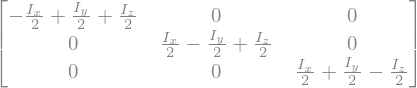

In [6]:
eqs = [
    Eq(lhs_coeff, rhs_coeff)
    for lhs_coeff, rhs_coeff in zip(lhs_coeffs, rhs_coeffs)
]
display(eqs)
J_of_I = solve(eqs, numpy.diag(J).tolist())
J_solved = numpy.diag([J_of_I[numpy.diag(J)[i]] for i in range(3)])
display(Latex("$\\boldsymbol{J}=$"), Matrix(J_solved))

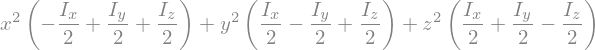

In [7]:
x = numpy.array(symbols("x y z"), dtype=Symbol)
(x.T @ J_solved @ x).collect(numpy.diag(I))